In [24]:
import numpy as np
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from matplotlib import*
from pandas import *



import astropy
from astropy import*
from astropy import units as u
from astropy import cosmology
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic 
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
import emcee
import corner
import scipy.optimize as op
from IPython.display import display, Math
from bigfloat import *

In [14]:
#begining the same MCMC analysis for the entier 1000 long data set sepearted into 3 bins at sig=.08
%cd
%cd Documents/summer2018/Simulated\ SN_data

/Users/chadharper
/Users/chadharper/Documents/summer2018/Simulated SN_data


In [25]:
signal_1 = np.matrix(np.loadtxt('interactive_test_800_11.txt', unpack = False))#800x800
dm8 = np.matrix(np.loadtxt('dm8', unpack = False))

In [12]:
#imporintg  data 
bin1_signal = np.matrix(np.loadtxt('bin1_signal.dat', unpack = False)) #15x15
bin2_signal = np.matrix(np.loadtxt('bin2_signal.dat', unpack = False)) #117x117
bin3_signal = np.matrix(np.loadtxt('bin3_signal.txt', unpack = False)) #352x352
bin4_signal = np.matrix(np.loadtxt('bin4_signal.txt', unpack = False)) #516x516
shell2_signal=np.matrix(np.loadtxt('newbin2output.txt',unpack=False))
%cd
%cd Documents 
SN_data_sim1= pd.read_csv('1SN_data_sim1.csv')

/Users/chadharper
/Users/chadharper/Documents


In [18]:
shell2_signal.shape

(132, 132)

In [5]:
dm_prep=SN_data_sim1['mb1']-SN_data_sim1['m_th']
def dm_cut(df,start,end):
    return df.loc[start:end]
dm_1=np.matrix(dm_cut(dm_prep,0,14))
dm_2=np.matrix(dm_cut(dm_prep,15,15+116))
dm_3=np.matrix(dm_cut(dm_prep,132,132+351))
dm_4=np.matrix(dm_cut(dm_prep,484,484+515))
dm_s2=np.matrix(dm_cut(dm_prep,0,131))
dm_s2.shape

(1, 132)

In [39]:
for i in range(50,75):
    size=i
    I=np.matrix(np.identity(size))
    c=signal_1[:size,:size]+.08**(2)*I
    with precision(500):
        print(np.linalg.det(c))

6.050787279776277e-100
4.967808900695113e-102
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/Users/chadharper/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [ ]:
r

In [65]:
np.argwhere(np.isnan(signal_))
#t=1

#for i in signal_1[:,51]:

 #   print(t,type(i[0,0]),i)
 #   if i=="nan":
  #      break
   # t+=1


array([[ 50,  51],
       [ 51,  50],
       [450, 451],
       [451, 450],
       [608, 609],
       [609, 608]])

In [ ]:
print(signal_1[:52])

In [29]:
def lnlike(theta,dm,signal,size):
    sigma,A,M= theta
    I=np.matrix(np.identity(size))
    C=A*signal+sigma**(2)*I
    inv_C=inv(C)
    detC=np.linalg.slogdet(C)
    print(detC)
    Dm=dm+np.matrix(M*np.ones(size))
    #print(np.matmul(inv_C,np.transpose(Dm)).shape)
    #print(.5*np.matmul(np.transpose(Dm),np.matmul(inv_C,Dm)))
    return ((-.5*detC[1])-(.5*np.matmul(Dm,np.matmul(inv_C,np.transpose(Dm)))))[0,0]



In [30]:
#test
theta=[.08,.6,0]
signal=signal_1
size=800
v=lnlike(theta,dm8,signal,size)
print(v)

(-1.0, nan)
nan


/Users/chadharper/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


In [38]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

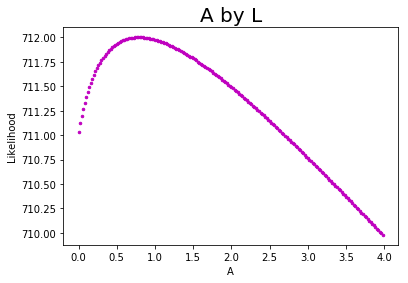

In [43]:
#Further testing by ploting 
a=[]
for i in frange(0,4,.02):
    like=lnlike([.08,i,0],dm_3,bin3_signal,352)
    a.append(like)
A=np.arange(0,4,.02)
plt.plot(A,a,'m.',markersize=5)
plt.xlabel('A')
plt.ylabel('Likelihood')
plt.title('A by L', fontsize=20)
#plt.savefig('First 208Galaxy Location(b,l).png')
plt.show()

In [68]:
#MCMC
def lnprior(theta):#Prior
    sigma,A,M= theta
    if .005 < sigma < 0.3 and 0< A < 5 and -1 < M < 1:
        return 0.0
    return -np.inf

def lnprob(theta,dm,signal,size):  #prob
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta,dm,signal,size)

In [79]:
ndim, nwalkers = 3, 50
pos = [[.08,.6,0] + [1e-2, 0.2, 0.03]*np.random.randn(ndim) for i in range(nwalkers)]

In [49]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dm_1,bin1_signal,15))

In [50]:
sampler.run_mcmc(pos,800 )

(array([[ 1.12617090e-01,  2.99012154e-01, -2.71521181e-02],
        [ 1.10610569e-01,  1.68778523e+00,  1.30852886e-02],
        [ 8.50677738e-02,  1.30790559e+00, -5.28600573e-02],
        [ 1.05336485e-01,  1.50622706e+00,  5.88556514e-02],
        [ 1.11202546e-01,  1.18082229e+00, -6.46408623e-02],
        [ 1.02657768e-01,  9.16176476e-02, -1.57437432e-02],
        [ 1.07717392e-01,  4.26795964e-01, -6.31640109e-02],
        [ 1.09251351e-01,  3.90925697e+00, -6.55231223e-02],
        [ 1.79234489e-01,  1.28753861e+00, -1.83627481e-02],
        [ 9.83306588e-02,  1.25472963e+00,  6.43191249e-02],
        [ 9.82646697e-02,  5.31793092e-02, -1.66049068e-02],
        [ 1.21195640e-01,  5.80657264e-01,  4.18124496e-02],
        [ 1.28755617e-01,  9.41669786e-01, -6.58583437e-02],
        [ 1.18707527e-01,  5.31320067e-01, -6.35480852e-02],
        [ 1.09055651e-01,  1.39456720e-01,  4.56550214e-03],
        [ 9.56655370e-02,  1.62704169e+00,  3.29828081e-03],
        [ 8.01948388e-02

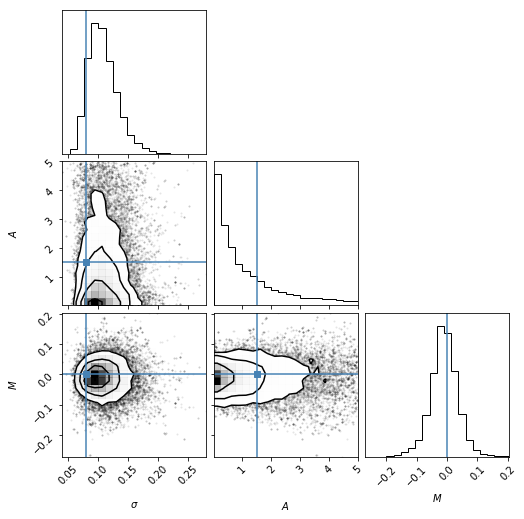

In [51]:
samples = sampler.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])



In [53]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dm_2,bin2_signal,117))
sampler2.run_mcmc(pos,800 )

(array([[ 7.82706112e-02,  4.50778535e+00, -4.42608765e-02],
        [ 8.88787692e-02,  1.42160068e+00, -1.96471794e-02],
        [ 8.50660426e-02,  2.93623347e+00, -3.16091330e-02],
        [ 8.58535584e-02,  1.55459830e+00, -9.19062821e-03],
        [ 9.37862911e-02,  1.97357355e-01, -1.18181011e-02],
        [ 9.02970642e-02,  1.62636897e+00, -1.88238472e-02],
        [ 8.48700472e-02,  6.35773717e-01, -3.25949934e-02],
        [ 9.16668246e-02,  7.24691764e-01, -2.03332896e-02],
        [ 8.66183478e-02,  2.38568456e-01, -2.38432775e-02],
        [ 8.14948634e-02,  6.89884384e-01, -2.10420771e-02],
        [ 7.96166188e-02,  1.80257565e+00, -4.07695947e-02],
        [ 8.66771825e-02,  2.46270604e+00, -9.26654551e-03],
        [ 8.89375257e-02,  1.40217412e+00,  2.62069565e-02],
        [ 8.26280781e-02,  1.61553391e+00, -6.03781337e-02],
        [ 9.55080669e-02,  2.05381759e+00,  4.77582777e-03],
        [ 8.45317200e-02,  4.63993399e+00, -3.62764450e-02],
        [ 9.12915898e-02

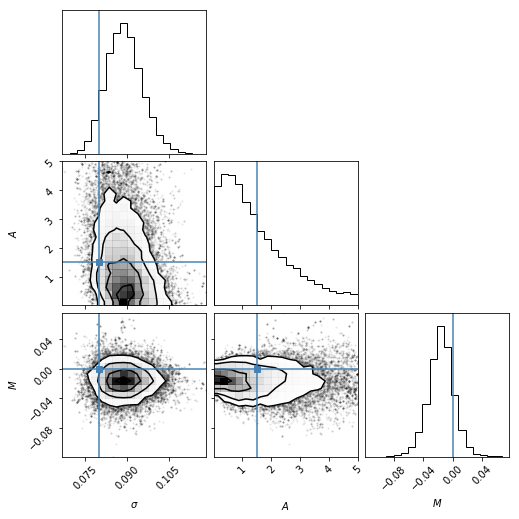

In [54]:
samples2 = sampler2.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples2, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])

In [55]:
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dm_3,bin3_signal,352))
sampler3.run_mcmc(pos,800 )

(array([[ 7.92213447e-02,  1.74864747e+00,  8.83186527e-04],
        [ 7.56851339e-02,  1.39847371e+00, -8.69261194e-03],
        [ 7.63549588e-02,  4.88331833e+00, -9.29301158e-03],
        [ 7.85680656e-02,  4.21172059e-01,  8.94795847e-03],
        [ 8.00390030e-02,  2.20537147e+00,  3.79839105e-03],
        [ 7.55869441e-02,  1.90263455e+00, -1.55078025e-02],
        [ 8.17607117e-02,  3.53412179e+00,  1.26893198e-03],
        [ 7.97447789e-02,  2.33483899e+00, -1.69444810e-02],
        [ 8.00756897e-02,  6.08615950e-01, -9.97422180e-04],
        [ 7.41665631e-02,  6.69947806e-01,  1.00170336e-03],
        [ 7.95033570e-02,  6.25283655e-01, -8.67637840e-03],
        [ 7.47665574e-02,  2.45928807e+00, -1.53337144e-02],
        [ 8.11009009e-02,  2.51529994e+00, -4.85681106e-03],
        [ 8.18553399e-02,  4.00004304e+00,  1.02395058e-04],
        [ 7.72221806e-02,  1.25206475e+00,  7.72883548e-03],
        [ 8.04439336e-02,  9.62899876e-01, -8.31377101e-03],
        [ 7.77922352e-02

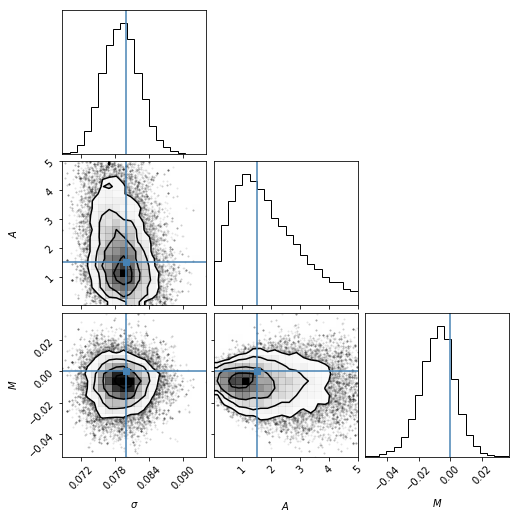

In [56]:
samples3 = sampler3.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples3, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])

In [60]:
sampler4 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dm_4,bin4_signal,516))
sampler4.run_mcmc(pos,800 )

(array([[ 8.01489975e-02,  1.28851634e+00, -4.81524274e-03],
        [ 8.05021652e-02,  2.61745835e+00, -7.24583718e-03],
        [ 8.64241564e-02,  3.07261492e+00, -1.66367375e-02],
        [ 7.76859582e-02,  5.05256856e-01,  1.46980866e-03],
        [ 8.21562691e-02,  2.04304497e+00, -1.28696581e-03],
        [ 8.17216658e-02,  2.86715490e-01, -1.17380869e-02],
        [ 8.28314941e-02,  3.59022153e+00,  1.31783308e-02],
        [ 8.19454379e-02,  2.54124912e-01, -6.31631074e-03],
        [ 7.89412739e-02,  2.51415651e+00, -1.95876645e-02],
        [ 8.70743106e-02,  2.46854799e+00, -4.25860471e-04],
        [ 8.29561663e-02,  5.77469650e-01, -1.01522936e-02],
        [ 8.48531644e-02,  3.05329399e-01, -3.92445722e-03],
        [ 8.94590439e-02,  3.22061325e+00,  1.54501784e-04],
        [ 9.07008782e-02,  1.32514162e+00,  6.88367859e-04],
        [ 8.55533726e-02,  4.45279577e-01, -1.06877526e-02],
        [ 8.34827326e-02,  1.55669734e+00, -5.36629862e-03],
        [ 8.01853913e-02

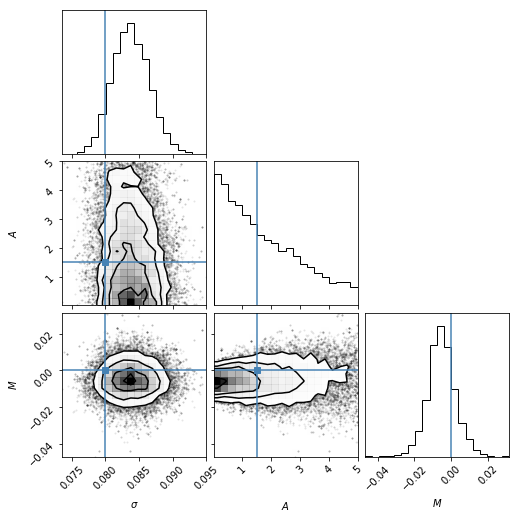

In [91]:
samples4 = sampler4.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples4, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])

In [92]:
labels = ["\sigma", "A", "M"]

for i in range(ndim):
    mcmc = np.percentile(samples4[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.8f}}}^{{{2:.8f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
for i in range(ndim):
    mcmc = np.percentile(samples3[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.5f}}}^{{{2:.5f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
for i in range(ndim):
    mcmc = np.percentile(samples2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [67]:
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

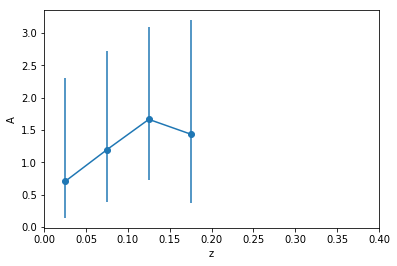

In [38]:

Amax=[1.596,1.530,1.425,1.762]
Amin=[-.565,-.815,-.938,-1.068]
A=[.703,1.194,1.663,1.4342]
x=[0.025, 0.075, 0.125, 0.175]

plt.errorbar(x, A,yerr=[np.abs(Amin),Amax])
plt.scatter(x,A)
plt.xlim(0, .4)
plt.xlabel("z")
plt.ylabel("A");

In [47]:
f=[0.44435737, 0.43633611, 0.4265034 , 0.41476195]

amax=[1.762,1.425,1.530,1.596]
amin=[1.068,.938,.815,.565]

In [44]:
A=[1.9758,1.28957,1.0927,.838451]


In [30]:
print(A[0]*f[0],A[1]*f[1],A[2]*f[2],A[3]*f[3])

0.8779612916459999 0.5626859573727 0.46604026517999997 0.34775757173945


In [35]:
def Df(a,aerr):
    return .5*a**(-1)*aerr

In [36]:
f_upperr=Df(A,amax)

In [37]:
f_lowerr=Df(A,amin)

In [49]:
fsigma=[0.44435737*1.9758,0.43633611*1.28957,0.4265034*1.0927,0.41476195*.838451]
fuerr=[]
flerr=[]
for x,y in zip(A,amax):
    error=Df(x,y)
    fuerr.append(error)
    


In [55]:
for x,y in zip(A,amin):
    error=Df(x,y)
    flerr.append(error)
print(flerr)

[0.2702702702702703, 0.3636871205130392, 0.37292944083462976, 0.33693084032340587, 0.2702702702702703, 0.3636871205130392, 0.37292944083462976, 0.33693084032340587, 0.2702702702702703, 0.3636871205130392, 0.37292944083462976, 0.33693084032340587, 0.2702702702702703, 0.3636871205130392, 0.37292944083462976, 0.33693084032340587]


ValueError: In safezip, len(args[0])=4 but len(args[1])=8

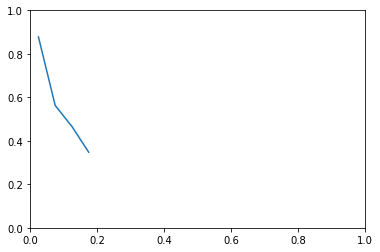

In [52]:

x=[0.025, 0.075, 0.125, 0.175]

plt.errorbar(x, fsigma,yerr=[flerr,fuerr])
plt.scatter(x,A)
plt.xlim(0, .4)
plt.xlabel("z")
plt.ylabel("\f_sigma");

In [80]:
sampler_s2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dm_s2,shell2_signal,132))

In [87]:
sampler_s2.run_mcmc(pos,8000 )

(array([[ 8.86555220e-02,  2.02250570e-01, -1.99282504e-02],
        [ 8.07583913e-02,  2.59204814e-01, -1.78163108e-02],
        [ 8.40375551e-02,  1.14217534e-01, -2.11182275e-02],
        [ 9.26645612e-02,  4.36592926e-02, -2.36387395e-02],
        [ 8.73875625e-02,  8.18603014e-02, -1.28325396e-02],
        [ 9.20080090e-02,  6.73880388e-01, -1.61151009e-02],
        [ 8.90928748e-02,  1.98028131e-01, -1.32291473e-02],
        [ 9.62596005e-02,  1.05216624e+00, -2.72191510e-03],
        [ 9.74181621e-02,  4.13545620e-01, -1.21671959e-02],
        [ 8.83533726e-02,  2.47552658e-01, -4.65064252e-03],
        [ 8.17445316e-02,  1.10538197e+00,  1.41926730e-03],
        [ 9.21606725e-02,  5.93928309e-01, -8.95111164e-03],
        [ 9.40196862e-02,  6.12950956e-01, -1.01438682e-02],
        [ 9.49296082e-02,  2.86395822e-01, -9.37297605e-03],
        [ 9.72854800e-02,  2.06169457e-01, -1.40073081e-02],
        [ 9.28220151e-02,  6.88956814e-01, -4.89533659e-03],
        [ 8.49723743e-02

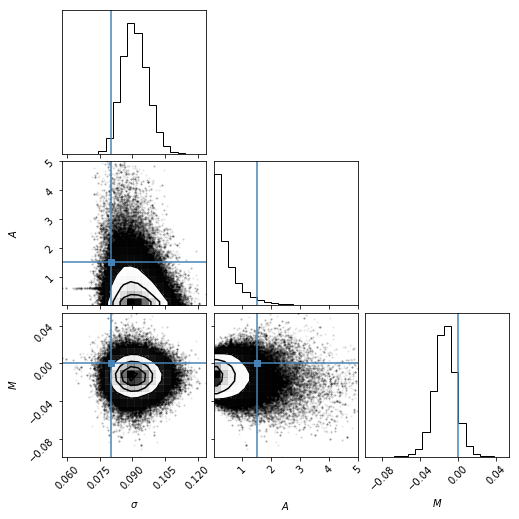

In [88]:
samples_s2 = sampler_s2.chain[:, 100:, :].reshape((-1, ndim))
fig = corner.corner(samples_s2, labels=["$\sigma$", "$A$", "$M$"],
                      truths=[.08, 1.5, 0])

In [89]:
labels = ["\sigma", "A", "M"]

for i in range(ndim):
    mcmc = np.percentile(samples_s2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>